In [1]:
from CovMat import *
import gc
from cl_and_cov import *
from signal_to_noise import *
from fisher_FoM import *

In [2]:
import numpy as np
Omega_m = 0.30
Omega_b = 0.05
h = 0.7
sigma8 = 0.8
n_s= 1
w_0 = -1
w_a = 0
transfer_function = 'bbks'
fsky = 5000/41253

In [3]:
# Input Cosmology object with a given set of parameters
cosmo = ccl.Cosmology(
    Omega_c = Omega_m-Omega_b, Omega_b=Omega_b, h=h, sigma8=sigma8, n_s=n_s,
    transfer_function=transfer_function)

In [4]:
arcmin_per_str=(180*60/np.pi)**2
#how many square arcminutes are there in a steradian 
numdenPerStr = arcmin_per_str*10

In [5]:
#make 3 galaxy distributions as dndz=slope*z, 
#ideally, as the slope get closer to 1, the overlapping between two binning methods should decrease
#the percentage difference in signal to noise should decrease as well
def distr(z, slope):
    density = (4-z)**slope
    return density

dndz1 = np.zeros([600,2])
dndz1[:, 0] = np.linspace(0.01, 3.01, 600)
dndz1[:, 1] = distr(dndz1[:, 0], 1)

dndz2 = np.zeros([600,2])
dndz2[:, 0] = np.linspace(0.01, 3.01, 600)
dndz2[:, 1] = distr(dndz2[:, 0], 2)

dndz3 = np.zeros([600,2])
dndz3[:, 0] = np.linspace(0.01, 3.01, 600)
dndz3[:, 1] = distr(dndz3[:, 0], 3)

dndz4 = np.zeros([600,2])
dndz4[:, 0] = np.linspace(0.01, 3.01, 600)
dndz4[:, 1] = distr(dndz4[:, 0], 4)

In [6]:
ell = np.arange(10, 3000)
#the lowest l is set to 10 in the paper, and the highest l is found by figure 1

In [7]:
#binning in l
binl=10**np.linspace(np.log10(15), np.log10(2500), 10)

In [8]:
binl

array([  15.        ,   26.48276595,   46.75579283,   82.54818122,
        145.74027753,  257.30704397,  454.28014821,  802.03965608,
       1416.01523304, 2500.        ])

In [9]:
cl1 = {} 
cov1 = {}
redshifts1 = {}
sliced_dndz1 = {}

for n in range(1,7):
    for btype in ["z", "n"]:
        cov1["{0}_{1}".format(btype, n)], cl1["{0}_{1}".format(btype, n)], redshifts1["{0}_{1}".format(btype, n)], sliced_dndz1["{0}_{1}".format(btype, n)] = getDataArray(n_bins=n, bin_type=btype, cosmo=cosmo, dndz=dndz1, ell=ell, numdenPerStr = numdenPerStr, fsky=0.4, shape_noise=0.23)
        

In [10]:

cl2 = {} 
cov2 = {}
redshifts2 = {}
sliced_dndz2 = {}

for n in range(1,7):
    for btype in ["z", "n"]:
        cov2["{0}_{1}".format(btype, n)], cl2["{0}_{1}".format(btype, n)], redshifts2["{0}_{1}".format(btype, n)], sliced_dndz2["{0}_{1}".format(btype, n)] = getDataArray(n_bins=n, bin_type=btype, cosmo=cosmo, dndz=dndz2, ell=ell, numdenPerStr = numdenPerStr, fsky=0.4, shape_noise=0.23)
        

In [11]:

cl3 = {} 
cov3 = {}
redshifts3 = {}
sliced_dndz3 = {}

for n in range(1,7):
    for btype in ["z", "n"]:
        cov3["{0}_{1}".format(btype, n)], cl3["{0}_{1}".format(btype, n)], redshifts3["{0}_{1}".format(btype, n)], sliced_dndz3["{0}_{1}".format(btype, n)] = getDataArray(n_bins=n, bin_type=btype, cosmo=cosmo, dndz=dndz3, ell=ell, numdenPerStr = numdenPerStr, fsky=0.4, shape_noise=0.23)
       

In [12]:
cl4 = {} 
cov4 = {}
redshifts4 = {}
sliced_dndz4 = {}

for n in range(1,7):
    for btype in ["z", "n"]:
        cov4["{0}_{1}".format(btype, n)], cl4["{0}_{1}".format(btype, n)], redshifts4["{0}_{1}".format(btype, n)], sliced_dndz4["{0}_{1}".format(btype, n)] = getDataArray(n_bins=n, bin_type=btype, cosmo=cosmo, dndz=dndz4, ell=ell, numdenPerStr = numdenPerStr, fsky=0.4, shape_noise=0.23)
        

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

mpl.rcParams.update({'font.size': 24})

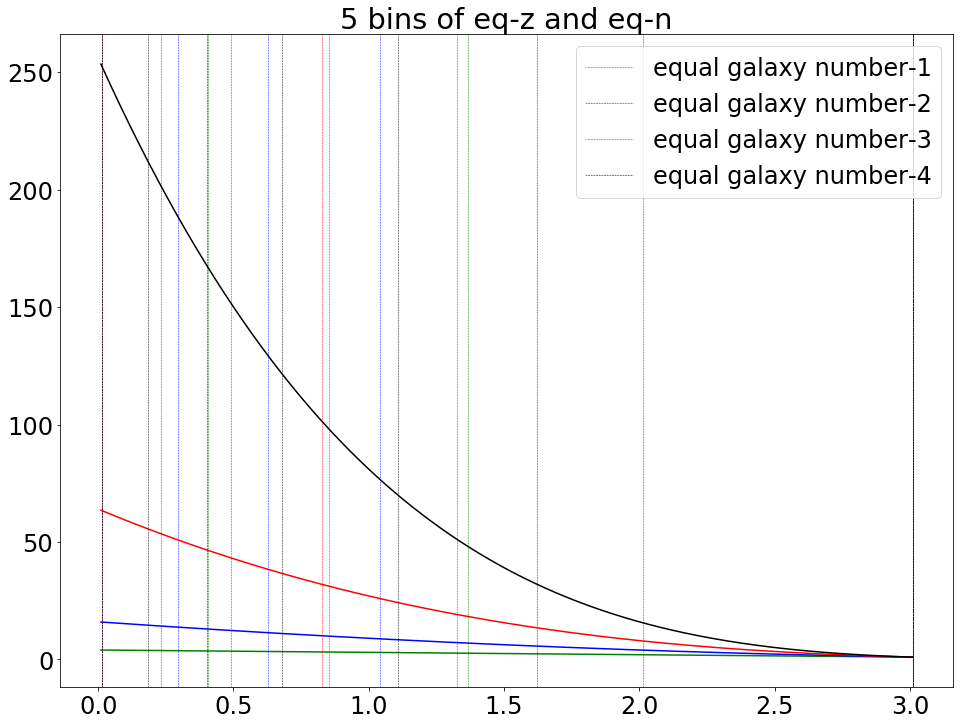

In [14]:
plt.figure()
plt.plot(dndz1[:,0], dndz1[:,1], color="g")
for x in redshifts1["n_5"]:
    plt.axvline(x, linewidth=0.5, color="g", linestyle="--")
plt.axvline(x, linewidth=0.5, color="g", linestyle="--", label="equal galaxy number-1")

plt.plot(dndz2[:,0], dndz2[:,1], color="b")
for x in redshifts2["n_5"]:
    plt.axvline(x, linewidth=0.5, color="b", linestyle="--")
plt.axvline(x, linewidth=0.5, color="b", linestyle="--", label="equal galaxy number-2")

plt.plot(dndz3[:,0], dndz3[:,1], color="r")
for x in redshifts3["n_5"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
plt.axvline(x, linewidth=0.5, color="r", linestyle="--", label="equal galaxy number-3")

plt.plot(dndz4[:,0], dndz4[:,1], color="k")
for x in redshifts4["n_5"]:
    plt.axvline(x, linewidth=0.5, color="k", linestyle="--")
plt.axvline(x, linewidth=0.5, color="k", linestyle="--", label="equal galaxy number-4")

plt.title('5 bins of eq-z and eq-n')
plt.legend(loc='upper right')
plt.show()

In [15]:
stn1 = {}
for i in ["z", "n"]:
    for j in range(1,7):
        stn1["{0}_{1}".format(i,j)] = SignalToNoise(bins_in_z=j, binl=binl, cl = cl1["{0}_{1}".format(i, j)], cov = cov1["{0}_{1}".format(i, j)], ell=ell)

In [16]:
stn2 = {}
for i in ["z", "n"]:
    for j in range(1,7):
        stn2["{0}_{1}".format(i,j)] = SignalToNoise(bins_in_z=j, binl=binl, cl = cl2["{0}_{1}".format(i, j)], cov = cov2["{0}_{1}".format(i, j)], ell=ell)

In [17]:
stn3 = {}
for i in ["z", "n"]:
    for j in range(1,7):
        stn3["{0}_{1}".format(i,j)] = SignalToNoise(bins_in_z=j, binl=binl, cl = cl3["{0}_{1}".format(i, j)], cov= cov3["{0}_{1}".format(i, j)], ell=ell)

In [18]:
stn4 = {}
for i in ["z", "n"]:
    for j in range(1,7):
        stn4["{0}_{1}".format(i,j)] = SignalToNoise(bins_in_z=j, binl=binl, cl = cl4["{0}_{1}".format(i, j)], cov = cov4["{0}_{1}".format(i, j)], ell=ell)

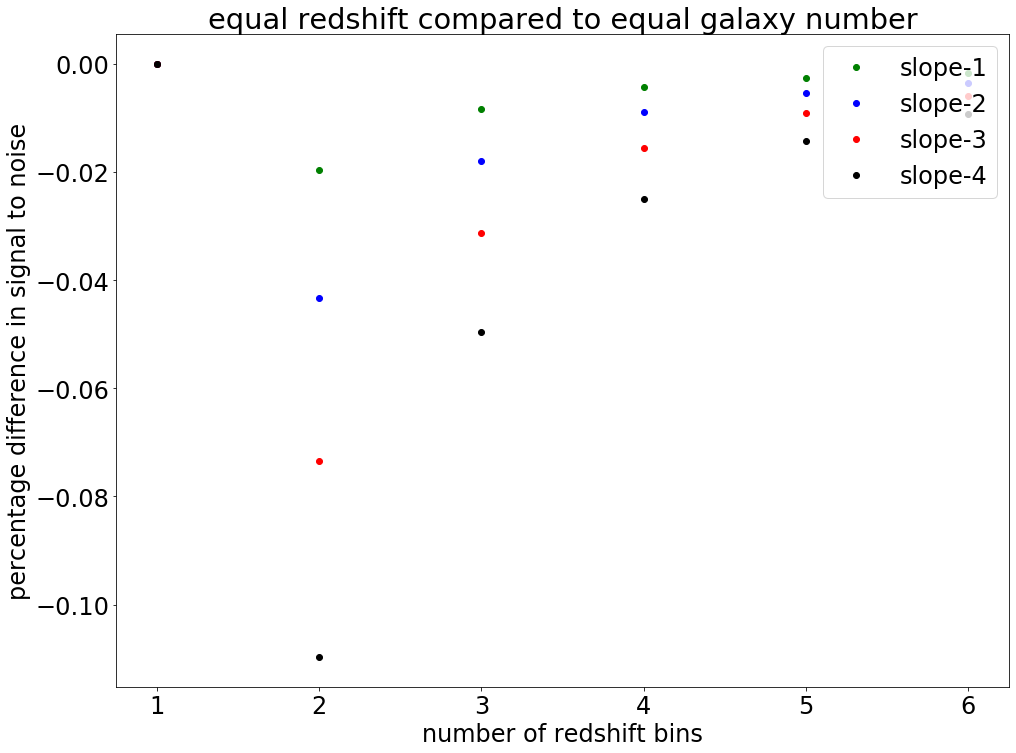

In [19]:
plt.figure(figsize=(16,12))
plt.plot([1, 2, 3, 4, 5, 6], [stn1["z_1"]/stn1["n_1"]-1, stn1["z_2"]/stn1["n_2"]-1, stn1["z_3"]/stn1["n_3"]-1, stn1["z_4"]/stn1["n_4"]-1, stn1["z_5"]/stn1["n_5"]-1, stn1["z_6"]/stn1["n_6"]-1],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "slope-1")

plt.plot([1, 2, 3, 4, 5, 6], [stn2["z_1"]/stn2["n_1"]-1, stn2["z_2"]/stn2["n_2"]-1, stn2["z_3"]/stn2["n_3"]-1, stn2["z_4"]/stn2["n_4"]-1, stn2["z_5"]/stn2["n_5"]-1, stn2["z_6"]/stn2["n_6"]-1],
         color='b', linestyle='None', marker ="o", markersize = 6.0, label = "slope-2")
plt.plot([1, 2, 3, 4, 5, 6], [stn3["z_1"]/stn3["n_1"]-1, stn3["z_2"]/stn3["n_2"]-1, stn3["z_3"]/stn3["n_3"]-1, stn3["z_4"]/stn3["n_4"]-1, stn3["z_5"]/stn3["n_5"]-1, stn3["z_6"]/stn3["n_6"]-1],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "slope-3")

plt.plot([1, 2, 3, 4, 5, 6], [stn4["z_1"]/stn4["n_1"]-1, stn4["z_2"]/stn4["n_2"]-1, stn4["z_3"]/stn4["n_3"]-1, stn4["z_4"]/stn4["n_4"]-1, stn4["z_5"]/stn4["n_5"]-1, stn4["z_6"]/stn4["n_6"]-1],
         color='k', linestyle='None', marker ="o", markersize = 6.0, label = "slope-4")
plt.xlabel("number of redshift bins")
plt.ylabel("percentage difference in signal to noise")
plt.legend(loc="upper right")
plt.title('equal redshift compared to equal galaxy number')
plt.show() 